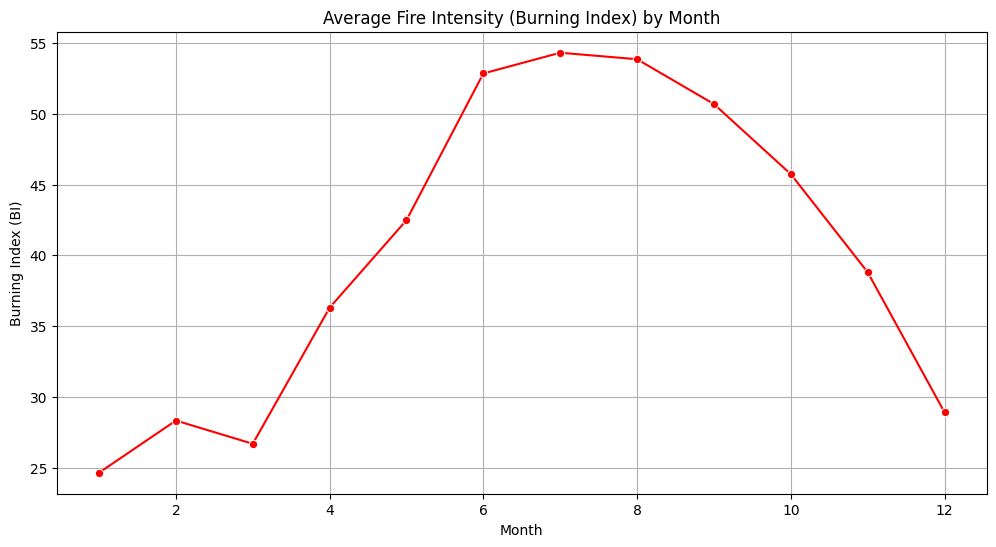

✅ Time Series Graph Generated: 'seasonal_trends.png'


C:\TEMP\ipykernel_23568\1107979073.py:52: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('pca_visualization.png') # Save for Report
C:\Users\HASHIR\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


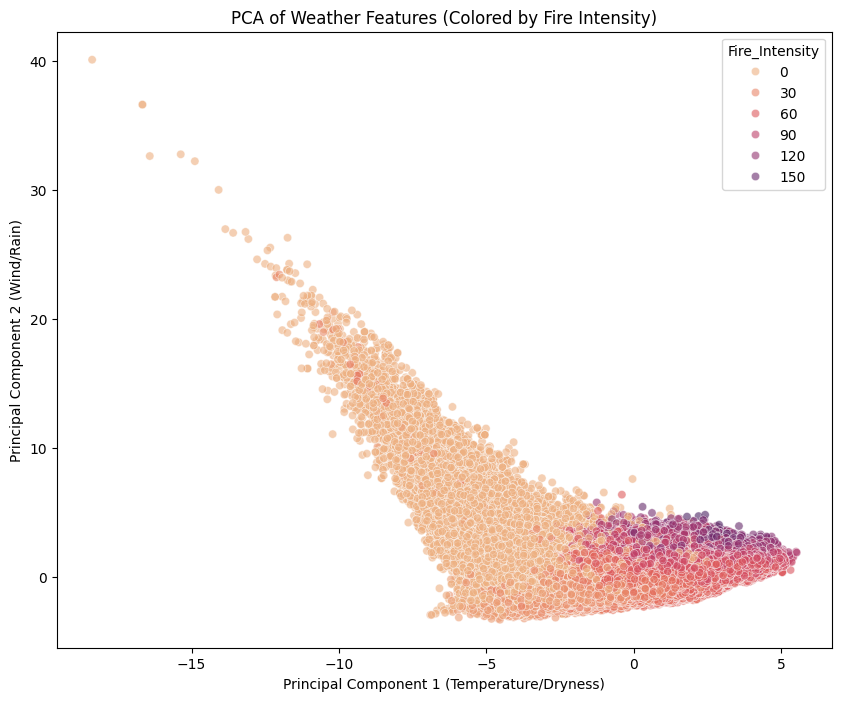

✅ PCA Visualization Generated: 'pca_visualization.png'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Load Data
df = pd.read_csv('../data/processed/california_wildfire.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

# ==========================================
# PART A: TIME SERIES ANALYSIS 
# Goal: Show seasonal fire trends (Climate Patterns)
# ==========================================
plt.figure(figsize=(12, 6))
# Extract month for seasonality
df['month'] = df['datetime'].dt.month
monthly_fire_intensity = df.groupby('month')['bi'].mean()

sns.lineplot(x=monthly_fire_intensity.index, y=monthly_fire_intensity.values, marker='o', color='red')
plt.title('Average Fire Intensity (Burning Index) by Month')
plt.xlabel('Month')
plt.ylabel('Burning Index (BI)')
plt.grid(True)
plt.savefig('seasonal_trends.png') # Save for Report
plt.show()
print("✅ Time Series Graph Generated: 'seasonal_trends.png'")

# ==========================================
# PART B: DIMENSIONALITY REDUCTION (PCA) 
# Goal: Visualize high-dimensional weather data in 2D
# ==========================================
features = ['tmmn', 'tmmx', 'rmin', 'rmax', 'vs', 'pr', 'erc']
x = df[features].dropna()

# Standardize features (Mean=0, Var=1)
x_scaled = StandardScaler().fit_transform(x)

# Run PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add Fire Intensity for coloring
pca_df['Fire_Intensity'] = df['bi']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Fire_Intensity', data=pca_df, palette='flare', alpha=0.6)
plt.title('PCA of Weather Features (Colored by Fire Intensity)')
plt.xlabel('Principal Component 1 (Temperature/Dryness)')
plt.ylabel('Principal Component 2 (Wind/Rain)')
plt.savefig('pca_visualization.png') # Save for Report
plt.show()
print("✅ PCA Visualization Generated: 'pca_visualization.png'")